In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
df=pd.read_csv('BI_ITS_Cleaned & Transformed student data.csv')

In [7]:
df.head()

,Full_Name,Enrollment_ID,Age_Group,Gender,State,Department,Program,Year_of_Study,Regular_transportation_mode,Source_of_Admission_Information,Primary_Reason_for_Choosing_the_College,Preferred_Time_for_Studying,Preferred_Device_for_Study,Use_of_Library,Participation_in_Extracurricular_Activities,Gym_Membership,Monthly_spending_on_essentials,Post-Graduation_Plans
0,Mohd Atif,22stucddd04008,19-22,Male,Uttarakhand,ICFAI Tech School,B.sc(Data science),Third Year,Walking,College website,Specific programs or majors offered,Late Night,Laptop,Weekly,"Sports & games (cricket, badminton, chess, etc.)","Yes, on-campus gym","Less than ₹10,000",Further Studies
1,Nishant Mathur testing file,636373,27-30,Male,Uttarakhand,ICFAI Tech School,Ph.D,Fifth Year,Public transport,School counselor,Campus facilities,Night,Laptop,Monthly,"Academic clubs (debate, quiz, etc.)",No,"₹10,000 - ₹19,999",Start a Business
2,Akshat Gupta,23STUCDDD01016,15-18,Male,Uttarakhand,ICFAI Tech School,B. Tech,First Year,Personal vehicle,Friends or family,Family or friends' recommendations,Early Morning,Laptop,Weekly,"Sports & games (cricket, badminton, chess, etc.)","Yes, off-campus gym","Less than ₹10,000",Job in other Domain
3,Rishi Gupta,23STUCDDN04002,19-22,Male,Delhi,ICFAI Tech School,B.sc(Data science),Second Year,Walking,Social media,Specific programs or majors offered,Early Morning,Laptop,Daily,"Sports & games (cricket, badminton, chess, etc.)","Yes, on-campus gym","Less than ₹10,000",Start a Business
4,Lovely Chauhan,lovelychauhan071@gmail.com,19-22,Female,Uttar pradesh,ICFAI Tech School,B. Tech,First Year,Walking,Social media,Specific programs or majors offered,Evening,Laptop,Daily,"Arts (singing, dancing, painting, etc.)","Yes, off-campus gym","Less than ₹10,000",Further Studies


In [8]:
df.isna().sum()

Full_Name                                      0
Enrollment_ID                                  0
Age_Group                                      0
Gender                                         0
State                                          0
Department                                     0
Program                                        0
Year_of_Study                                  0
Regular_transportation_mode                    0
Source_of_Admission_Information                0
Primary_Reason_for_Choosing_the_College        0
Preferred_Time_for_Studying                    0
Preferred_Device_for_Study                     0
Use_of_Library                                 0
Participation_in_Extracurricular_Activities    0
Gym_Membership                                 0
Monthly_spending_on_essentials                 0
Post-Graduation_Plans                          0
dtype: int64

In [11]:
features = [
    'Age_Group', 'Gender', 'State', 'Program', 'Year_of_Study',
    'Regular_transportation_mode', 'Preferred_Time_for_Studying',
    'Preferred_Device_for_Study', 'Use_of_Library',
    'Participation_in_Extracurricular_Activities', 'Gym_Membership',
    'Monthly_spending_on_essentials'
]
x=df[features]
y=df['Post-Graduation_Plans']

In [17]:
encoder=OneHotEncoder(sparse=False)
x_encoded=encoder.fit_transform(x)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y,test_size=0.2,random_state=42)

In [40]:
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [58]:
y_pred=model.predict(x_test)
y_pred

array(['Job in Field of Study', 'Job in Field of Study',
       'Job in Field of Study', 'Job in Field of Study',
       'Job in Field of Study', 'Job in Field of Study',
       'Job in Field of Study', 'Job in Field of Study',
       'Job in Field of Study', 'Further Studies',
       'Job in Field of Study', 'Job in Field of Study',
       'Job in Field of Study', 'Job in Field of Study',
       'Job in Field of Study', 'Further Studies',
       'Job in Field of Study', 'Further Studies'], dtype=object)

In [72]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f'Model Accuracy: {accuracy*100:.1f} %')
print('Report:',report)

Model Accuracy: 33.3 %
Report:                        precision    recall  f1-score   support

      Further Studies       0.33      0.11      0.17         9
Job in Field of Study       0.33      0.71      0.45         7
  Job in other Domain       0.00      0.00      0.00         1
     Start a Business       0.00      0.00      0.00         1

             accuracy                           0.33        18
            macro avg       0.17      0.21      0.16        18
         weighted avg       0.30      0.33      0.26        18



C:\Users\AC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
set(y_test)-set(y_pred)

{'Job in other Domain', 'Start a Business'}

<AxesSubplot:>

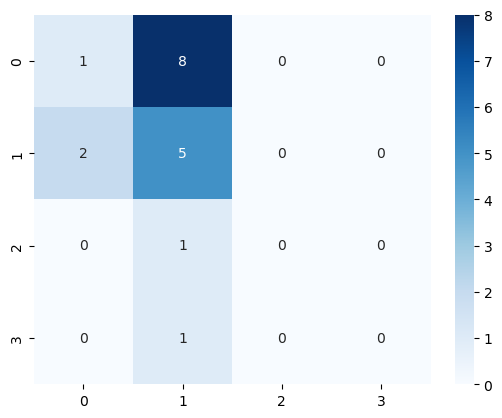

In [80]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xticks([''])